In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
pd.isnull(df)
print (np.sum(pd.isnull(df)))

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [4]:
df = df.dropna()

c:\users\97439\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Summary', ylabel='count'>

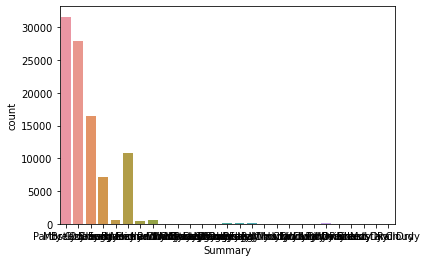

In [5]:
sns.countplot(df['Summary'])

In [6]:
df['Summary'].loc[df['Summary'] == 'Partly Cloudy'] = 1
df['Summary'].loc[df['Summary'] == 'Mostly Cloudy'] = 1
df['Summary'].loc[df['Summary'] != 1] = -1
print(df.groupby('Summary')['Summary'].count())

Summary
-1    36387
 1    59549
Name: Summary, dtype: int64


c:\users\97439\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-6-8e3c031a0a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'].loc[df['Summary'] == 'Partly Cloudy'] = 1
<ipython-input-6-8e3c031a0a4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'].loc[df['Summary'] =

c:\users\97439\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Summary', ylabel='count'>

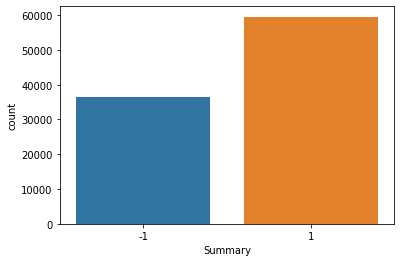

In [7]:
sns.countplot(df['Summary'])

In [8]:
print(df.groupby('Precip Type')['Precip Type'].count())

Precip Type
rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [9]:
df['Precip Type'].loc[df['Precip Type'] == 'rain'] = 1.
df['Precip Type'].loc[df['Precip Type'] == 'snow'] = 2.
print(df.groupby('Precip Type')['Precip Type'].count())

Precip Type
1.0    85224
2.0    10712
Name: Precip Type, dtype: int64


c:\users\97439\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-9-e01645d8ae4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precip Type'].loc[df['Precip Type'] == 'rain'] = 1.
<ipython-input-9-e01645d8ae4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precip Type'].loc[df['Precip 

In [10]:
print(df.groupby('Daily Summary')['Daily Summary'].count())

Daily Summary
Breezy and foggy starting in the evening.            24
Breezy and foggy until morning.                      24
Breezy and mostly cloudy overnight.                  24
Breezy and partly cloudy in the afternoon.           24
Breezy in the morning and foggy in the evening.      24
                                                   ... 
Partly cloudy until night.                         6169
Rain throughout the day.                             24
Rain until afternoon.                                17
Rain until morning.                                  12
Windy in the afternoon.                              24
Name: Daily Summary, Length: 214, dtype: int64


In [11]:
print(df.groupby('Loud Cover')['Loud Cover'].count())

Loud Cover
0.0    95936
Name: Loud Cover, dtype: int64


In [12]:
df = df.drop(columns = ["Formatted Date"])
df = df.drop(columns = ["Daily Summary"])
df = df.drop(columns = ["Loud Cover"])

In [13]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,1,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,1,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,1,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,1,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [14]:
X = df.drop(columns = ["Summary"])
y = df["Summary"]
print (X)
print (y)

      Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0               1         9.472222                  7.388889      0.89   
1               1         9.355556                  7.227778      0.86   
2               1         9.377778                  9.377778      0.89   
3               1         8.288889                  5.944444      0.83   
4               1         8.755556                  6.977778      0.83   
...           ...              ...                       ...       ...   
96448           1        26.016667                 26.016667      0.43   
96449           1        24.583333                 24.583333      0.48   
96450           1        22.038889                 22.038889      0.56   
96451           1        21.522222                 21.522222      0.60   
96452           1        20.438889                 20.438889      0.61   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0                14.1197                  

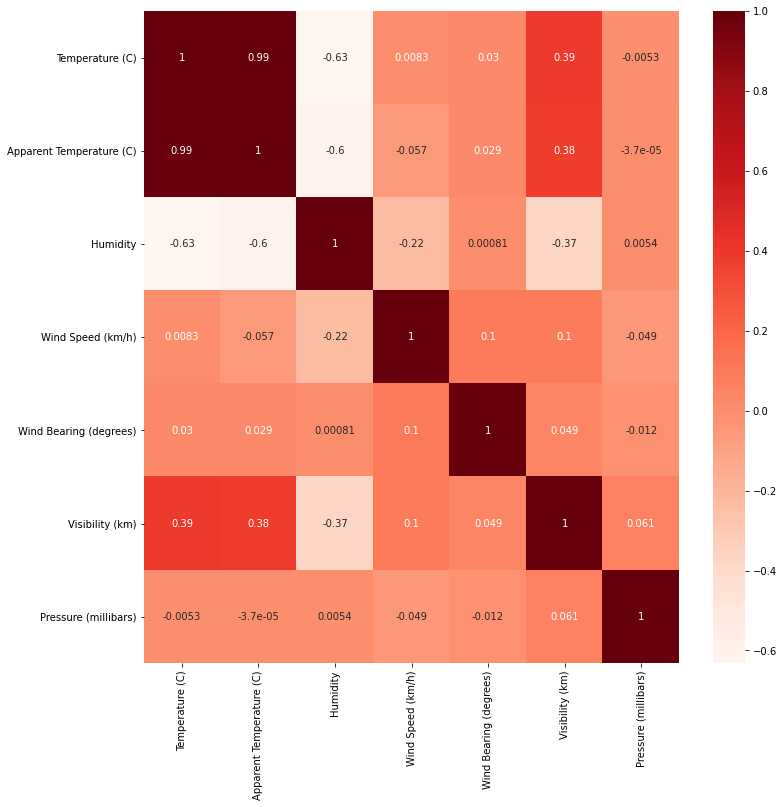

In [15]:
cor = X.corr()

plt.figure(figsize = (12,12))
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [16]:
X = X.drop(columns = ["Apparent Temperature (C)"])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X

array([[0.        , 0.50697507, 0.89      , ..., 0.69916435, 0.983     ,
        0.97013513],
       [0.        , 0.50508505, 0.86      , ..., 0.72144847, 0.983     ,
        0.97061297],
       [0.        , 0.50544505, 0.89      , ..., 0.56824513, 0.929     ,
        0.97090923],
       ...,
       [0.        , 0.71055711, 0.56      , ..., 0.08356546, 1.        ,
        0.97064164],
       [0.        , 0.70218702, 0.6       , ..., 0.05571031, 1.        ,
        0.97091879],
       [0.        , 0.68463685, 0.61      , ..., 0.1086351 , 0.964     ,
        0.97111948]])

In [18]:
# n = len(X)
# X_train = np.asarray(X)[:int(0.7*n),:]
# y_train = np.asarray(y)[:int(0.7*n)]
# X_train.shape

In [19]:
# X_test = np.asarray(X)[int(0.7*n):,:]
# y_test = np.asarray(y)[int(0.7*n):]
# X_test.shape

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# linear classifier

In [21]:
w = np.linalg.inv(X_train.transpose()@X_train)@X_train.transpose()@y_train
y_hat = np.sign(X_train@w)

In [22]:
error_rate = np.sum(y_hat != y_train)/y_train.shape
accuracy = 1 - error_rate
accuracy

array([0.72834487])

# SVD 

In [23]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)
print('U = ',U.round(3), sep="\n", end='\n\n')
print('Singular Values = ',s.round(3), sep="\n", end='\n\n')
print('V^T = ',VT.round(3), sep="\n", end='\n\n')

U = 
[[-0.004  0.002  0.    ...  0.004 -0.003  0.001]
 [-0.003  0.003 -0.005 ... -0.008  0.002 -0.002]
 [-0.004 -0.001  0.001 ...  0.    -0.     0.004]
 ...
 [-0.004  0.001 -0.002 ...  0.006 -0.001  0.001]
 [-0.004  0.001 -0.003 ... -0.001  0.006 -0.001]
 [-0.004  0.001  0.    ...  0.006 -0.001  0.002]]

Singular Values = 
[411.053  93.188  73.679  60.331  42.853  28.759  24.887]

V^T = 
[[-0.066 -0.345 -0.462 -0.106 -0.341 -0.413 -0.604]
 [-0.796  0.278 -0.35   0.026 -0.004  0.4   -0.08 ]
 [-0.076 -0.098 -0.127  0.015  0.934 -0.229 -0.211]
 [ 0.564  0.03  -0.55   0.052  0.09   0.593 -0.125]
 [-0.118 -0.563  0.489 -0.098  0.036  0.514 -0.394]
 [ 0.093  0.399  0.112 -0.881  0.037  0.023 -0.205]
 [-0.125 -0.564 -0.307 -0.447  0.04   0.025  0.609]]



In [24]:
r = 6
w_svd = VT[:r,:].T @ np.diag(1/s[:r]) @ U[:,:r].T @ y_train
y_hat_svd = np.sign(X_train@w_svd)

In [25]:
error_rate = np.sum(y_hat_svd != y_train)/y_train.shape
accuracy = 1 - error_rate
accuracy

array([0.71875512])

# regularization

In [26]:
Lambda = np.logspace(-10,10,num = 50,base = 2)
Lambda

array([9.76562500e-04, 1.29589385e-03, 1.71964506e-03, 2.28196091e-03,
       3.02815142e-03, 4.01834271e-03, 5.33232190e-03, 7.07596613e-03,
       9.38977382e-03, 1.24601858e-02, 1.65346080e-02, 2.19413472e-02,
       2.91160647e-02, 3.86368811e-02, 5.12709598e-02, 6.80363228e-02,
       9.02838809e-02, 1.19806286e-01, 1.58982379e-01, 2.10968870e-01,
       2.79954700e-01, 3.71498572e-01, 4.92976861e-01, 6.54177979e-01,
       8.68091107e-01, 1.15195282e+00, 1.52863599e+00, 2.02849277e+00,
       2.69180039e+00, 3.57200647e+00, 4.74003581e+00, 6.29000526e+00,
       8.34680745e+00, 1.10761743e+01, 1.46980313e+01, 1.95042185e+01,
       2.58820063e+01, 3.43453008e+01, 4.55760529e+01, 6.04792082e+01,
       8.02556253e+01, 1.06498838e+02, 1.41323458e+02, 1.87535565e+02,
       2.48858814e+02, 3.30234477e+02, 4.38219601e+02, 5.81515352e+02,
       7.71668141e+02, 1.02400000e+03])

In [27]:
for lam in Lambda:
    w = np.linalg.inv(X_train.transpose()@X_train+lam*np.eye(X_train.shape[1]))@X_train.transpose()@y_train
    y_hat = np.sign(X_train@w)
    error_rate = np.sum(y_hat != y_train)/y_train.shape
    accuracy = 1 - error_rate
    print ("lambda =", lam, ", accuracy =", accuracy)

lambda = 0.0009765625 , accuracy = [0.72834487]
lambda = 0.0012958938515892147 , accuracy = [0.72834487]
lambda = 0.0017196450555768113 , accuracy = [0.72834487]
lambda = 0.002281960913344293 , accuracy = [0.72834487]
lambda = 0.003028151415981853 , accuracy = [0.72834487]
lambda = 0.004018342708891707 , accuracy = [0.72834487]
lambda = 0.005332321904671864 , accuracy = [0.72834487]
lambda = 0.007075966127061773 , accuracy = [0.72834487]
lambda = 0.00938977382206761 , accuracy = [0.72834487]
lambda = 0.012460185767762717 , accuracy = [0.72834487]
lambda = 0.01653460800112963 , accuracy = [0.72834487]
lambda = 0.021941347171432177 , accuracy = [0.72834487]
lambda = 0.02911606466052441 , accuracy = [0.72834487]
lambda = 0.03863688107627274 , accuracy = [0.72834487]
lambda = 0.05127095975047737 , accuracy = [0.72834487]
lambda = 0.06803632282185909 , accuracy = [0.72834487]
lambda = 0.09028388088789624 , accuracy = [0.72834487]
lambda = 0.11980628596760347 , accuracy = [0.72834487]
lambda

# SVD For Regularization

In [28]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

In [29]:
Lambda = np.logspace(-10,10,num = 50,base = 2)
Lambda

array([9.76562500e-04, 1.29589385e-03, 1.71964506e-03, 2.28196091e-03,
       3.02815142e-03, 4.01834271e-03, 5.33232190e-03, 7.07596613e-03,
       9.38977382e-03, 1.24601858e-02, 1.65346080e-02, 2.19413472e-02,
       2.91160647e-02, 3.86368811e-02, 5.12709598e-02, 6.80363228e-02,
       9.02838809e-02, 1.19806286e-01, 1.58982379e-01, 2.10968870e-01,
       2.79954700e-01, 3.71498572e-01, 4.92976861e-01, 6.54177979e-01,
       8.68091107e-01, 1.15195282e+00, 1.52863599e+00, 2.02849277e+00,
       2.69180039e+00, 3.57200647e+00, 4.74003581e+00, 6.29000526e+00,
       8.34680745e+00, 1.10761743e+01, 1.46980313e+01, 1.95042185e+01,
       2.58820063e+01, 3.43453008e+01, 4.55760529e+01, 6.04792082e+01,
       8.02556253e+01, 1.06498838e+02, 1.41323458e+02, 1.87535565e+02,
       2.48858814e+02, 3.30234477e+02, 4.38219601e+02, 5.81515352e+02,
       7.71668141e+02, 1.02400000e+03])

In [30]:
for lam in Lambda:
    w = VT.T@np.linalg.inv(np.diag(s**2)+lam*np.eye(7))@U.T@y_train
    y_hat = np.sign(X_train@w)
    error_rate = np.sum(y_hat != y_train)/y_train.shape
    accuracy = 1 - error_rate
    print ("lambda =", lam, ", accuracy =", accuracy)

lambda = 0.0009765625 , accuracy = [0.66544561]
lambda = 0.0012958938515892147 , accuracy = [0.66544561]
lambda = 0.0017196450555768113 , accuracy = [0.66544561]
lambda = 0.002281960913344293 , accuracy = [0.66544561]
lambda = 0.003028151415981853 , accuracy = [0.66544561]
lambda = 0.004018342708891707 , accuracy = [0.66544561]
lambda = 0.005332321904671864 , accuracy = [0.66544561]
lambda = 0.007075966127061773 , accuracy = [0.66544561]
lambda = 0.00938977382206761 , accuracy = [0.6654605]
lambda = 0.012460185767762717 , accuracy = [0.6654605]
lambda = 0.01653460800112963 , accuracy = [0.6654605]
lambda = 0.021941347171432177 , accuracy = [0.6654605]
lambda = 0.02911606466052441 , accuracy = [0.6654605]
lambda = 0.03863688107627274 , accuracy = [0.6654605]
lambda = 0.05127095975047737 , accuracy = [0.6654605]
lambda = 0.06803632282185909 , accuracy = [0.6654605]
lambda = 0.09028388088789624 , accuracy = [0.6654605]
lambda = 0.11980628596760347 , accuracy = [0.6654605]
lambda = 0.15898

# KNN

In [31]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2,weights="distance",algorithm="auto")
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6571  4383]
 [ 4286 13541]]
              precision    recall  f1-score   support

          -1       0.61      0.60      0.60     10954
           1       0.76      0.76      0.76     17827

    accuracy                           0.70     28781
   macro avg       0.68      0.68      0.68     28781
weighted avg       0.70      0.70      0.70     28781



In [35]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

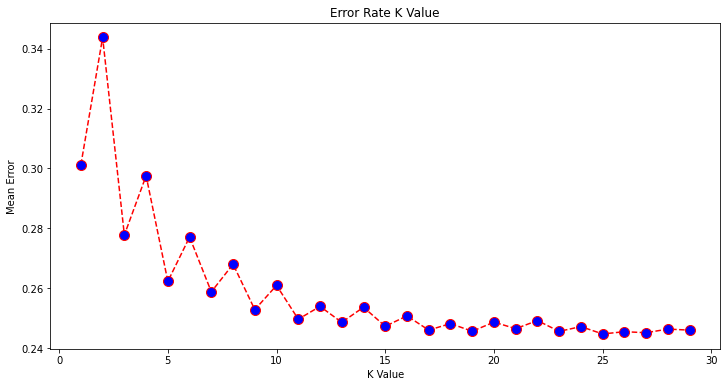

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Neural Network

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
y_train = (np.sign(y_train)/2 + 0.5).astype("int")
y_test = (np.sign(y_test)/2 + 0.5).astype("int")

In [39]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim = 7,activation="relu"))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

    opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

In [40]:
def train_model(model, X_train, y_train, T):
    model.fit(X_train, y_train, epochs=T)

train_model(model, X_train, y_train, 20)

Epoch 1/20
2099/2099 [==============================] - 2s 821us/step - loss: 0.5359 - accuracy: 0.7363
Epoch 2/20
2099/2099 [==============================] - 2s 793us/step - loss: 0.5169 - accuracy: 0.7458
Epoch 3/20
2099/2099 [==============================] - 2s 806us/step - loss: 0.5121 - accuracy: 0.7476
Epoch 4/20
2099/2099 [==============================] - 2s 813us/step - loss: 0.5095 - accuracy: 0.7495
Epoch 5/20
2099/2099 [==============================] - 2s 786us/step - loss: 0.5078 - accuracy: 0.7505
Epoch 6/20
2099/2099 [==============================] - 2s 791us/step - loss: 0.5065 - accuracy: 0.7500
Epoch 7/20
2099/2099 [==============================] - 2s 786us/step - loss: 0.5050 - accuracy: 0.7514
Epoch 8/20
2099/2099 [==============================] - 2s 800us/step - loss: 0.5040 - accuracy: 0.7519
Epoch 9/20
2099/2099 [==============================] - 2s 796us/step - loss: 0.5029 - accuracy: 0.7527
Epoch 10/20
2099/2099 [==============================] - 2s 802u

In [41]:
def evaluate_model(model, X_test, y_test, show_loss=True):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    if show_loss == True:
        print("Loss: " + str(np.round(test_loss, 4)))
    print("Accuracy:", str(np.round(100*test_accuracy, 2)) + "%")
    
evaluate_model(model, X_test, y_test)

900/900 [==============================] - 1s 583us/step - loss: 0.5005 - accuracy: 0.7534
Loss: 0.5005
Accuracy: 75.34%


In [42]:
def predict_label(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape((y_pred.shape[0],))
    y_pred = np.where(y_pred <= 0.5,y_pred,0)
    y_pred = np.where(y_pred > 0.5,y_pred,1)
    error = np.sum(y_test != y_pred)
    accuracy = 1 - error/y_test.shape[0]
    print ("Accuracy:", str(np.round(100*accuracy, 2)) + "%")

predict_label(model, X_test, y_test)

Accuracy: 61.94%
